#HP Laptop Data Scraping

##Importing dependencies

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

from bs4 import BeautifulSoup
import pandas as pd
import requests
import re


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 261 kB in 7s (36.0 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not s

###Initializing web driver and establishing connection with a website for scraping

In [ ]:
url = 'https://www.hp.com/in-en/shop/laptops-tablets.html?p=3'  # url of a website

In [ ]:
driver = webdriver.Chrome(options=options)
driver.get(url)
html_content = driver.page_source

In [ ]:
soup = BeautifulSoup(html_content, 'html.parser') #transforming retrieved data into html format

In [ ]:
soup.find('h2', attrs = {'class':'plp-h2-title stellar-title__small'}).text.strip() #retrieving title of a laptop

'HP Laptop 39.6 cm (15.6) 15-fd0021TU, Blue'

In [ ]:
titles = soup.find_all('h2', attrs = {'class':'plp-h2-title stellar-title__small'})

In [ ]:
title_list = []

In [ ]:
for title in titles:
    title_list.append(title.text.strip())

In [ ]:
title_list

['HP Laptop 39.6 cm (15.6) 15-fd0021TU, Blue',
 'HP Laptop 39.6 cm (15.6) 15-fd0011TU, Silver',
 'HP Laptop 39.6 cm (15.6) 15s-eq2144AU, Silver',
 'HP Laptop 39.6 cm (15.6) 15s-eq2223AU, Silver',
 'HP Laptop 39.6 cm (15.6) 15-fd0022TU, White',
 'HP OMEN 40.9 cm (16.1) Gaming Laptop 16, Black',
 'HP OMEN 40.9 cm (16.1) Gaming Laptop 16, Black',
 'HP OMEN Transcend 35.6 cm (14) Gaming Laptop 14, Black',
 'HP OMEN 40.9 cm (16.1) Gaming Laptop 16, Black',
 'HP OMEN 40.9 cm (16.1) Gaming Laptop 16-xf0100AX, Black',
 'HP Pavilion 35.6 cm (14) Laptop 14-dv2053TU, Silver',
 'HP Pavilion 35.6 cm (14) Laptop 14-dv2015TU, Silver',
 'HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116TU, Silver',
 'HP Pavilion 35.6 cm (14) Laptop 14-dv2014TU, Silver',
 'HP Laptop 39.6 cm (15.6) 15s-fq5326TU, Silver']

In [ ]:
soup.find_all('div', attrs = {'class':'product-desc-features stellar-body__small'})[6].text

'\n\nAMD Ryzen™ 9 7940HS processor\nWindows 11 Home\n40.9 cm (16.1) diagonal FHD display 240 Hz, 7 ms response time\nNVIDIA® GeForce RTX™ 4070, Total Graphics Power (TGP) up to 140W\n32 GB DDR5 RAM\n1 TB SSD Solid State Drive\nBacklit RGB 4-zone Keyboard, True Vision 1080p FHD camera, B&O Speakers\n '

In [ ]:
temp = soup.find_all('div', attrs = {'class':'product-desc-features stellar-body__small'})[6].text

###code to retrieve disk values

In [ ]:
string = temp
pattern_gb = r'(\d{1,3} GB|\d{1,3} TB)'
disk = re.findall(pattern_gb, string)
print(disk)

['32 GB', '1 TB']


###code to recognize cpu model

In [ ]:
pattern_cpu = r'(i\d|Ryzen|Celeron)'
cpu_model = re.findall(pattern_cpu, string)
print(cpu_model)

['Ryzen']


###code to recognize screen size in inches

In [ ]:
pattern_cpu = r"\((\d{1,2}.\d{1,2})\)"
screen_size = re.findall(pattern_cpu, string)
print(screen_size)

['16.1']


###code to recogniz brand of a graphics

In [ ]:
def graphics_categorization(string):
  if 'nvidia' in string.lower():
    return 'Nvidia'
  elif 'amd' in string.lower():
    return 'AMD'
  elif 'radeon' in string.lower():
    return 'AMD'
  elif 'intel' in string.lower():
    return 'Intel'
  else:
    return 'Other'
graphics_categorization(temp)

'Nvidia'

In [ ]:
soup.find('span', attrs = {'class':'price'}).text.strip()

'₹72,780'

In [ ]:
prices = soup.find_all('span', attrs = {'class':'price'})

###code to retrieved price of a laptop

In [ ]:
price_list = []
for i in range(len(prices)):
  if i % 5 == 2:
    price = prices[i]
    price_list.append(price.text.strip())
    print(price.text.strip())

₹59,999
₹59,999
₹43,999
₹41,078
₹59,999
₹133,999
₹179,999
₹209,999
₹209,999
₹165,506
₹56,999
₹76,999
₹72,999
₹61,999
₹40,326


In [ ]:
soup.find_all('div', attrs = {'class':'bv_text'})[0].text

'4.4'

##Scraping HP data

###Extracting Ratings

In [ ]:
def get_ratings(ratings):
  """
  Extracts ratings from a list of rating elements.

  Args:
    ratings: A list of rating elements.

  Returns:
    A list of extracted ratings.
  """
  rating_list = []
  for rating in ratings:
    rating_list.append(rating.text)
  return rating_list

###Extracting titles

In [ ]:
def get_titles(titles):
  """
  Extracts titles from a list of title elements.

  Args:
    titles: A list of title elements.

  Returns:
    A list of extracted titles.
  """
  title_list = []
  for title in titles:
    title_list.append(title.text.strip())
  return title_list


###Extracting RAM and HDD

In [ ]:
def get_RAM_and_HDD(strings):
  """
  Extracts RAM and HDD values from a list of string elements.

  Args:
    strings: A list of string elements.

  Returns:
    A tuple of lists of extracted RAM and HDD values.
  """

  ram = []
  hdd = []

  for string in strings:
    pattern_gb = r'(\d{1,3} GB|\d{1,3} TB|\d{1,3}GB|\d{1,3}TB)'
    disk = re.findall(pattern_gb, string)

    if len(disk) > 0:
      ram.append(disk[0])
    else:
      ram.append('NA')
      hdd.append('NA')
    if len(disk) > 1:
      hdd.append(disk[1])
    else:
      hdd.append('NA')
  return ram, hdd

###Extracting CPU Model

In [ ]:
def get_cpu_model(strings):
  """
  Extracts CPU model values from a list of string elements.

  Args:
    strings: A list of string elements.

  Returns:
    A list of extracted CPU model values.
  """

  cpu_model = []
  for string in strings:
    pattern_cpu = r'(i\d|Ryzen™\s\d|Celeron|Ultra\s\d|Core™\s\d)'
    cpu = re.findall(pattern_cpu, string)
    if len(cpu) > 0:
      cpu_model.append(cpu[0])
    else:
      cpu_model.append('NA')
  return cpu_model

###Extrcting Screen Size

In [ ]:
def get_screen_size(strings):
  """
  Extracts screen size values from a list of string elements.

  Args:
    strings: A list of string elements.

  Returns:
    A list of extracted screen size values.
  """

  screen_size = []
  for string in strings:
    pattern_cpu = r"\((\d{1,2}.\d{1,2}|\d{1,2})\)"
    screen = re.findall(pattern_cpu, string)
    if len(screen) > 0:
      screen_size.append(screen[0])
    else:
      screen_size.append('NA')
  return screen_size

###Extracting Graphics

In [ ]:
def get_graphics_categorization(strings):
  """
  Categorizes graphics based on a list of string elements.

  Args:
    strings: A list of string elements.

  Returns:
    A list of categorized graphics.
  """

  graphics = []
  for string in strings:
    if 'nvidia' in string.lower():
      graphics.append('Nvidia')
    elif 'amd' in string.lower():
      graphics.append('AMD')
    elif 'radeon' in string.lower():
      graphics.append('AMD')
    elif 'intel' in string.lower():
      graphics.append('Intel')
    else:
      graphics.append('Other')
  return graphics

###Extracting Prices

In [ ]:
def get_prices(prices):
  """
  Extracts prices from a list of price elements.

  Args:
    prices: A list of price elements.

  Returns:
    A list of extracted prices.
  """

  price_list = []
  for price in prices:
    if price.text.strip() != '':
      price_list.append(price.text.strip())
    else:
      price_list.append('NA')
  return price_list

In [ ]:
all_title_list = []
all_ram_list = []
all_hdd_list = []
all_cpu_model_list = []
all_screen_size_list = []
all_graphics_list = []
all_rating_list = []
all_price_list = []

for i in range(1, 18):
  url = f'https://www.hp.com/in-en/shop/laptops-tablets.html?p={i}'  # iterating over url of a website for different pages
  driver.get(url)
  html_content = driver.page_source
  soup = BeautifulSoup(html_content, 'html.parser')

  # retrieving titles
  titles = soup.find_all('h2', attrs = {'class':'plp-h2-title stellar-title__small'})
  title_lst = get_titles(titles)
  all_title_list.extend(title_lst)

  strings = soup.find_all('div', attrs = {'class':'product-desc-features stellar-body__small'})

  # changing strings from 'ReseltSet' format to 'str' format for further processing
  strings_lst = []
  for string in strings:
    strings_lst.append(string.text.strip())

  # retrieving ram and hdd
  ram, hdd = get_RAM_and_HDD(strings_lst)
  all_ram_list.extend(ram)
  all_hdd_list.extend(hdd)

  # retrieving cpu model
  cpu_model = get_cpu_model(strings_lst)
  all_cpu_model_list.extend(cpu_model)

  # retrieving screen size
  screen_size = get_screen_size(strings_lst)
  all_screen_size_list.extend(screen_size)

  # retrieving graphics
  graphics = get_graphics_categorization(strings_lst)
  all_graphics_list.extend(graphics)

  # retrieving ratings
  ratings = soup.find_all('div', attrs = {'class':'bv_text'})
  ratings_lst = []
  for j in range(len(ratings)):
    if j % 2 == 0:
      ratings_lst.append(ratings[j])
  all_rating_list.extend(get_ratings(ratings_lst))

 # retrieving prices
  prices = soup.find_all('span', attrs = {'class':'price-wrapper price-including-tax'})
  price_lst = get_prices(prices)
  all_price_list.extend(price_lst)

In [ ]:
len(all_price_list), len(all_title_list), len(all_ram_list), len(all_hdd_list), len(all_cpu_model_list), len(all_screen_size_list), len(all_graphics_list), len(all_rating_list)

(254, 255, 255, 255, 255, 255, 255, 255)

##I tried scraping same pages from the hp website two days later, but half of the laptop information from the site was removed. Luckily, I had downloaded previously scraped information.

In [ ]:
brand = ['HP'] * 255

In [ ]:
df = pd.DataFrame({'Title': all_title_list, 'Brand': brand, 'Screen_Size': all_screen_size_list, 'CPU_Model': all_cpu_model_list, \
                   'Ram': all_ram_list, 'Rating': all_rating_list, 'Graphics': all_graphics_list, 'Disk_size': all_hdd_list, 'Price': all_price_list})

ValueError: All arrays must be of the same length

In [ ]:
df.tail()

In [ ]:
df.to_csv('hp_laptops.csv', index=False)

NameError: name 'df' is not defined

In [ ]:
import pandas as pd

In [ ]:
df_hp = pd.read_csv('/content/hp_laptops.csv')

In [ ]:
df_hp.shape

(255, 9)

In [ ]:
df_hp.head()

,Title,Brand,RAM,HDD,CPU Model,Screen Size,Graphics,Rating,Price
0,"HP Laptop 39.6 cm (15.6) 15s-fq5329TU, Silver",HP,8 GB,512 GB,i5,15.6,Intel,4.2,"₹51,846"
1,"HP Laptop 39.6 cm (15.6) 15-fd0221TU, Silver",HP,16 GB,512 GB,i5,15.6,Intel,4.4,"₹62,499"
2,"HP Laptop 39.6 cm (15.6) 15-fc0156AU, Silver",HP,16 GB,512 GB,Ryzen™ 5,15.6,AMD,4.3,"₹48,999"
3,HP OMEN 40.9 cm (16.1) Gaming Laptop 16-xd0020...,HP,8GB,16 GB,Ryzen™ 7,16.1,Nvidia,4.5,"₹119,999"
4,"HP Laptop 39.6 cm (15.6) 15-fc0155AU, Silver",HP,8 GB,512 GB,Ryzen™ 5,15.6,AMD,4.3,"₹45,999"


In [ ]:
df = df_hp[['Title', 'Brand', 'Screen Size', 'CPU Model', 'RAM', 'Rating', 'Graphics', 'HDD', 'Price']]

In [ ]:
df.head()

,Title,Brand,Screen Size,CPU Model,RAM,Rating,Graphics,HDD,Price
0,"HP Laptop 39.6 cm (15.6) 15s-fq5329TU, Silver",HP,15.6,i5,8 GB,4.2,Intel,512 GB,"₹51,846"
1,"HP Laptop 39.6 cm (15.6) 15-fd0221TU, Silver",HP,15.6,i5,16 GB,4.4,Intel,512 GB,"₹62,499"
2,"HP Laptop 39.6 cm (15.6) 15-fc0156AU, Silver",HP,15.6,Ryzen™ 5,16 GB,4.3,AMD,512 GB,"₹48,999"
3,HP OMEN 40.9 cm (16.1) Gaming Laptop 16-xd0020...,HP,16.1,Ryzen™ 7,8GB,4.5,Nvidia,16 GB,"₹119,999"
4,"HP Laptop 39.6 cm (15.6) 15-fc0155AU, Silver",HP,15.6,Ryzen™ 5,8 GB,4.3,AMD,512 GB,"₹45,999"


In [ ]:
df = df.rename(columns={'Screen Size': 'Screen_Size', 'CPU Model': 'CPU_Model', 'RAM': 'Ram', 'HDD': 'Disk_size'})

In [ ]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,"HP Laptop 39.6 cm (15.6) 15s-fq5329TU, Silver",HP,15.6,i5,8 GB,4.2,Intel,512 GB,"₹51,846"
1,"HP Laptop 39.6 cm (15.6) 15-fd0221TU, Silver",HP,15.6,i5,16 GB,4.4,Intel,512 GB,"₹62,499"
2,"HP Laptop 39.6 cm (15.6) 15-fc0156AU, Silver",HP,15.6,Ryzen™ 5,16 GB,4.3,AMD,512 GB,"₹48,999"
3,HP OMEN 40.9 cm (16.1) Gaming Laptop 16-xd0020...,HP,16.1,Ryzen™ 7,8GB,4.5,Nvidia,16 GB,"₹119,999"
4,"HP Laptop 39.6 cm (15.6) 15-fc0155AU, Silver",HP,15.6,Ryzen™ 5,8 GB,4.3,AMD,512 GB,"₹45,999"


In [ ]:
df.columns

Index(['Title', 'Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Rating',
       'Graphics', 'Disk_size', 'Price'],
      dtype='object')

In [ ]:
# Dropping all duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(244, 9)

In [ ]:
df.isna().sum()

,0
Title,0
Brand,0
Screen_Size,7
CPU_Model,9
Ram,0
Rating,0
Graphics,0
Disk_size,34
Price,0


###We will do little preprocessing on Ram and Disk_size features, so than missing values from the Disk_size feature can be addressed later using Ram feature.

In [ ]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,"HP Laptop 39.6 cm (15.6) 15s-fq5329TU, Silver",HP,15.6,i5,8 GB,4.2,Intel,512 GB,"₹51,846"
1,"HP Laptop 39.6 cm (15.6) 15-fd0221TU, Silver",HP,15.6,i5,16 GB,4.4,Intel,512 GB,"₹62,499"
2,"HP Laptop 39.6 cm (15.6) 15-fc0156AU, Silver",HP,15.6,Ryzen™ 5,16 GB,4.3,AMD,512 GB,"₹48,999"
3,HP OMEN 40.9 cm (16.1) Gaming Laptop 16-xd0020...,HP,16.1,Ryzen™ 7,8GB,4.5,Nvidia,16 GB,"₹119,999"
4,"HP Laptop 39.6 cm (15.6) 15-fc0155AU, Silver",HP,15.6,Ryzen™ 5,8 GB,4.3,AMD,512 GB,"₹45,999"


In [ ]:
df.Ram.unique()

array(['8 GB', '16 GB', '8GB', '32 GB', '6GB', '4GB', '6 GB', '4 GB',
       '32GB', '16GB', '64 GB', '12 GB'], dtype=object)

In [ ]:
df.Disk_size.unique()

array(['512 GB', '16 GB', '1TB', '1 TB', '2 TB', '512GB', '32 GB', nan,
       '8 GB', '64 GB', '256 GB', '128 GB'], dtype=object)

###Since, highest Ram size is of 64GB, we can safely replace all the missing values from the Disk_size feature with 512GB assuming Disk_size is usually observably than Ram size.

In [ ]:
df.Disk_size.fillna('512GB', inplace=True)

In [ ]:
df.isna().sum()

,0
Title,0
Brand,0
Screen_Size,7
CPU_Model,9
Ram,0
Rating,0
Graphics,0
Disk_size,0
Price,0


In [ ]:
df.CPU_Model.unique()

array(['i5', 'Ryzen™ 5', 'Ryzen™ 7', 'Ultra 7', 'Ultra 5', 'Core™ 3',
       'Core™ 5', 'Core™ 7', 'Ryzen™ 3', 'i3', 'Ryzen™ 9', 'Ultra 9',
       'i9', 'i7', nan, 'Celeron'], dtype=object)

###First, we will clean the Price feature. And further handle missing values from the CPU_model using Price.

In [ ]:
df.Price.unique()

array(['₹51,846', '₹62,499', '₹48,999', '₹119,999', '₹45,999', '₹136,999',
       '₹56,999', '₹107,999', '₹111,999', '₹186,999', '₹89,999',
       '₹200,999', '₹160,506', '₹49,999', '₹99,999', '₹170,499',
       '₹69,999', '₹79,999', '₹66,999', '₹35,999', '₹42,521', '₹98,999',
       '₹42,999', '₹46,999', '₹41,999', '₹84,999', '₹61,999', '₹59,999',
       '₹43,999', '₹41,078', '₹133,999', '₹179,999', '₹209,999',
       '₹165,506', '₹76,999', '₹72,999', '₹40,326', '₹81,999', '₹94,999',
       '₹91,999', '₹63,499', '₹42,729', '₹71,999', '₹50,649', '₹80,999',
       '₹87,999', '₹118,999', '₹93,999', '₹149,999', '₹129,999',
       '₹164,999', '₹165,999', '₹178,999', '₹115,999', '₹106,499',
       '₹168,999', '₹141,999', '₹238,199', '₹156,999', '₹92,999',
       '₹181,999', '₹102,999', '₹204,999', '₹223,999', '₹495,999',
       '₹157,999', '₹379,999', '₹413,999', '₹94,499', '₹125,999',
       '₹140,999', '₹147,999', '₹189,999', '₹196,999', '₹219,999',
       '₹246,999', '₹331,499', '₹351,99

In [ ]:
df.Price = df.Price.str.replace('₹', '').str.replace(',', '').astype(float)

In [ ]:
df.Price.unique()

array([ 51846.,  62499.,  48999., 119999.,  45999., 136999.,  56999.,
       107999., 111999., 186999.,  89999., 200999., 160506.,  49999.,
        99999., 170499.,  69999.,  79999.,  66999.,  35999.,  42521.,
        98999.,  42999.,  46999.,  41999.,  84999.,  61999.,  59999.,
        43999.,  41078., 133999., 179999., 209999., 165506.,  76999.,
        72999.,  40326.,  81999.,  94999.,  91999.,  63499.,  42729.,
        71999.,  50649.,  80999.,  87999., 118999.,  93999., 149999.,
       129999., 164999., 165999., 178999., 115999., 106499., 168999.,
       141999., 238199., 156999.,  92999., 181999., 102999., 204999.,
       223999., 495999., 157999., 379999., 413999.,  94499., 125999.,
       140999., 147999., 189999., 196999., 219999., 246999., 331499.,
       351999., 365499., 412999., 419499., 457999.,  86263.,  67093.,
        76678.,  82000.,  58719., 104999.,  85500.,  27999.,  59549.,
       121999.,  63999.,  87499.,  82999., 142999.,  64999.,  82238.,
        53419., 1019

<Axes: xlabel='Price', ylabel='Density'>

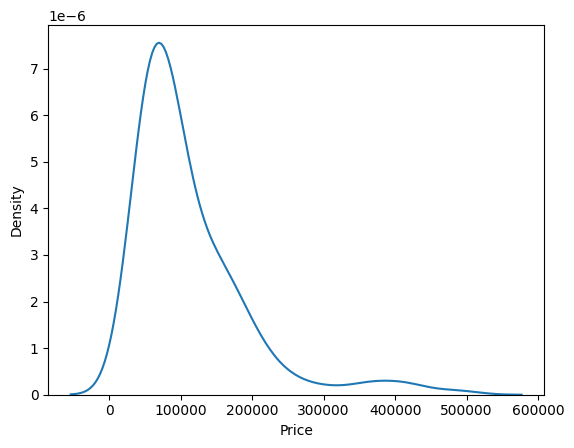

In [ ]:
import seaborn as sns
sns.kdeplot(df['Price'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 254
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        244 non-null    object 
 1   Brand        244 non-null    object 
 2   Screen_Size  237 non-null    float64
 3   CPU_Model    235 non-null    object 
 4   Ram          244 non-null    object 
 5   Rating       244 non-null    float64
 6   Graphics     244 non-null    object 
 7   Disk_size    244 non-null    object 
 8   Price        244 non-null    float64
dtypes: float64(3), object(6)
memory usage: 19.1+ KB


###Lets address missing values from the CPU_Model feature

In [ ]:
df[df.CPU_Model.isna()]

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
72,HP Elitebook Ultra 35.6 cm (14) G1q Business L...,HP,14.0,NaN,16 GB,5.0,Other,1 TB,168999.0
142,"HP 255 39.6 cm (15.6) G9 Business Laptop, Black",HP,15.6,NaN,4 GB,4.4,AMD,256 GB,27999.0
146,HP Omnibook X Laptop 35.6 cm (14) 14-fe0121QU ...,HP,NaN,NaN,16 GB,0.0,Other,1 TB,139999.0
149,HP Chromebook 35.6 cm (14) Laptop 14a-nf0014TU...,HP,14.0,NaN,4 GB,0.0,Intel,64 GB,29679.0
150,HP Chromebook x360 35.6 cm (14) Laptop 14b-cd0...,HP,14.0,NaN,8 GB,0.0,Intel,128 GB,40279.0
156,HP Chromebook x360 35.6 cm (14) Laptop 14b-cd0...,HP,14.0,NaN,8 GB,0.0,Intel,256 GB,49819.0
181,HP Chromebook x360 35.6 cm (14) Laptop 14b-cd0...,HP,14.0,NaN,4 GB,0.0,Intel,128 GB,36039.0
183,HP Chromebook 35.6 cm (14) Laptop 14a-nf0017TU...,HP,14.0,NaN,8 GB,0.0,Intel,256 GB,46639.0
184,HP Chromebook x360 35.6 cm (14) Laptop 14b-cd0...,HP,14.0,NaN,8 GB,0.0,Intel,128 GB,47699.0


In [ ]:
df[df.Price > 100000].head(20)

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
3,HP OMEN 40.9 cm (16.1) Gaming Laptop 16-xd0020...,HP,16.1,Ryzen™ 7,8GB,4.5,Nvidia,16 GB,119999.0
5,HP Envy x360 35.6 cm (14) 2-in-1 Laptop 14-fc0...,HP,14.0,Ultra 7,32 GB,4.0,Intel,1TB,136999.0
7,HP Envy x360 35.6 cm (14) 2-in-1 Laptop 14-fc0...,HP,14.0,Ultra 5,16 GB,4.0,Intel,512 GB,107999.0
8,HP Envy x360 35.6 cm (14) 2-in-1 Laptop 14-fc0...,HP,14.0,Ultra 7,16 GB,4.0,Intel,512 GB,111999.0
9,HP Spectre x360 40.6 cm (16) 2-in-1 Laptop OLE...,HP,16.0,Ultra 7,32 GB,4.8,Intel,2 TB,186999.0
11,HP Spectre x360 40.6 cm (16) 2-in-1 Laptop OLE...,HP,16.0,Ultra 7,32 GB,4.0,Nvidia,1 TB,200999.0
12,HP OMEN Transcend 35.6 cm (14) Gaming Laptop 1...,HP,14.0,Ultra 7,16 GB,4.3,Nvidia,1 TB,160506.0
15,HP Spectre x360 35.6 cm (14) 2-in-1 Laptop OLE...,HP,14.0,Ultra 7,32 GB,4.1,Intel,1 TB,170499.0
35,"HP OMEN 40.9 cm (16.1) Gaming Laptop 16, Black",HP,16.1,Ryzen™ 7,16 GB,4.5,Nvidia,1 TB,133999.0
36,"HP OMEN 40.9 cm (16.1) Gaming Laptop 16, Black",HP,16.1,Ryzen™ 9,32 GB,4.5,Nvidia,1 TB,179999.0


###It appears from the above dataframe that all laptops with Price greater than 1000000 are using CPU_Model with unit number >=7 (like i7, i9, Ryzen™ 9, Ultra 7, etc.). So, we will use following formula to handle missing values.
- if Price < 50000, then CPU_Model = i3
- if Price >= 50000 and Price <= 100000 then CPU_Model = Ultra 5
- if Price > 1000000, then CPU_Model = Ultra 7


In [ ]:
cpu_missing = df[df.CPU_Model.isna()]

In [ ]:
for i in cpu_missing.index:
  if cpu_missing.Price[i] < 50000:
    cpu_missing.CPU_Model[i] = 'i3'
  elif cpu_missing.Price[i] >= 50000 and cpu_missing.Price[i] <= 100000:
    cpu_missing.CPU_Model[i] = 'Ultra 5'
  elif cpu_missing.Price[i] > 100000:
    cpu_missing.CPU_Model[i] = 'Ultra 7'

<ipython-input-26-8d5a8eaa73fa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_missing.CPU_Model[i] = 'Ultra 7'
<ipython-input-26-8d5a8eaa73fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_missing.CPU_Model[i] = 'i3'
<ipython-input-26-8d5a8eaa73fa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_missing.CPU_Model[i] = 'Ultra 7'
<ipython-input-26-8d5a8eaa73fa>:3: SettingWithCopyWarning: 
A value is trying to be set on

In [ ]:
cpu_missing

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
72,HP Elitebook Ultra 35.6 cm (14) G1q Business L...,HP,14.0,Ultra 7,16 GB,5.0,Other,1 TB,168999.0
142,"HP 255 39.6 cm (15.6) G9 Business Laptop, Black",HP,15.6,i3,4 GB,4.4,AMD,256 GB,27999.0
146,HP Omnibook X Laptop 35.6 cm (14) 14-fe0121QU ...,HP,NaN,Ultra 7,16 GB,0.0,Other,1 TB,139999.0
149,HP Chromebook 35.6 cm (14) Laptop 14a-nf0014TU...,HP,14.0,i3,4 GB,0.0,Intel,64 GB,29679.0
150,HP Chromebook x360 35.6 cm (14) Laptop 14b-cd0...,HP,14.0,i3,8 GB,0.0,Intel,128 GB,40279.0
156,HP Chromebook x360 35.6 cm (14) Laptop 14b-cd0...,HP,14.0,i3,8 GB,0.0,Intel,256 GB,49819.0
181,HP Chromebook x360 35.6 cm (14) Laptop 14b-cd0...,HP,14.0,i3,4 GB,0.0,Intel,128 GB,36039.0
183,HP Chromebook 35.6 cm (14) Laptop 14a-nf0017TU...,HP,14.0,i3,8 GB,0.0,Intel,256 GB,46639.0
184,HP Chromebook x360 35.6 cm (14) Laptop 14b-cd0...,HP,14.0,i3,8 GB,0.0,Intel,128 GB,47699.0


In [ ]:
df.fillna(cpu_missing, inplace=True)

In [ ]:
df.isna().sum()

,0
Title,0
Brand,0
Screen_Size,7
CPU_Model,0
Ram,0
Rating,0
Graphics,0
Disk_size,0
Price,0


In [ ]:
df.shape

(244, 9)

##Time to address missing values from Screen_Size feature

In [ ]:
df.Screen_Size.unique()

array([15.6, 16.1, 14. , 16. ,  nan, 13.3, 13.5])

In [ ]:
df[df.Screen_Size.isna()]

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
51,HP Pavilion Plus 35.6 cm (14) Laptop 14-ey0789...,HP,NaN,Ryzen™ 7,16 GB,4.2,AMD,512GB,79999.0
58,HP Pavilion Laptop 16-ag0019AU,HP,NaN,Ryzen™ 5,16 GB,4.4,AMD,512GB,69999.0
146,HP Omnibook X Laptop 35.6 cm (14) 14-fe0121QU ...,HP,NaN,Ultra 7,16 GB,0.0,Other,1 TB,139999.0
168,HP ProBook 440 35.6 cm (14) G9 Business Laptop...,HP,NaN,i5,8 GB,4.3,Intel,512 GB,81999.0
211,"HP Pavilion 39.6 cm (15.6) Laptop 15-eh1147AU,...",HP,NaN,Ryzen™ 7,16 GB,4.2,AMD,1 TB,62999.0
231,HP ZBook Fury 40.6 cm (16) G10 Mobile Workstat...,HP,NaN,i7,12 GB,0.0,Nvidia,32 GB,379999.0
234,HP ProBook 445 35.6 cm (14) G9 Business Laptop...,HP,NaN,Ryzen™ 5,8 GB,4.6,AMD,512 GB,59999.0


In [ ]:
df[df.Screen_Size < 16]

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,"HP Laptop 39.6 cm (15.6) 15s-fq5329TU, Silver",HP,15.6,i5,8 GB,4.2,Intel,512 GB,51846.0
1,"HP Laptop 39.6 cm (15.6) 15-fd0221TU, Silver",HP,15.6,i5,16 GB,4.4,Intel,512 GB,62499.0
2,"HP Laptop 39.6 cm (15.6) 15-fc0156AU, Silver",HP,15.6,Ryzen™ 5,16 GB,4.3,AMD,512 GB,48999.0
4,"HP Laptop 39.6 cm (15.6) 15-fc0155AU, Silver",HP,15.6,Ryzen™ 5,8 GB,4.3,AMD,512 GB,45999.0
5,HP Envy x360 35.6 cm (14) 2-in-1 Laptop 14-fc0...,HP,14.0,Ultra 7,32 GB,4.0,Intel,1TB,136999.0
...,...,...,...,...,...,...,...,...,...
250,HP 240 35.6 cm (14) G9 Business Laptop PC,HP,14.0,i7,8 GB,0.0,Intel,512GB,57999.0
251,"HP 240 35.6 cm (14) G9 Business Laptop, Silver",HP,14.0,i3,8 GB,4.2,Intel,512 GB,58999.0
252,"HP 240 35.6 cm (14) G9 Business Laptop, Silver",HP,14.0,i5,8 GB,4.2,Intel,512 GB,64099.0
253,HP ProBook 440 35.6 cm (14) G9 Business Lapto...,HP,14.0,i5,8 GB,4.3,Intel,512 GB,64999.0


###Laptops with Price greater than 100000 have Screen_Size above 16 inch and we will follow following distribution to handle missing values
- if Price < 50000, then Screen_Size = 14
- if Price >= 50000 and Price <= 100000 then Screen_Size = 15
- if Price > 1000000, then Screen_Size = 16.1

In [ ]:
screen_missing = df[df.Screen_Size.isna()]

In [ ]:
for i in screen_missing.index:
  if screen_missing.Price[i] < 50000:
    screen_missing.Screen_Size[i] = 14
  elif screen_missing.Price[i] >= 50000 and screen_missing.Price[i] < 100000:
    screen_missing.Screen_Size[i] = 15
  else:
    screen_missing.Screen_Size[i] = 16.1

<ipython-input-35-67e47e5d90f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screen_missing.Screen_Size[i] = 15
<ipython-input-35-67e47e5d90f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screen_missing.Screen_Size[i] = 15
<ipython-input-35-67e47e5d90f4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screen_missing.Screen_Size[i] = 16.1
<ipython-input-35-67e47e5d90f4>:5: SettingWithCopyWarning: 
A value is trying to be set o

In [ ]:
screen_missing

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
51,HP Pavilion Plus 35.6 cm (14) Laptop 14-ey0789...,HP,15.0,Ryzen™ 7,16 GB,4.2,AMD,512GB,79999.0
58,HP Pavilion Laptop 16-ag0019AU,HP,15.0,Ryzen™ 5,16 GB,4.4,AMD,512GB,69999.0
146,HP Omnibook X Laptop 35.6 cm (14) 14-fe0121QU ...,HP,16.1,Ultra 7,16 GB,0.0,Other,1 TB,139999.0
168,HP ProBook 440 35.6 cm (14) G9 Business Laptop...,HP,15.0,i5,8 GB,4.3,Intel,512 GB,81999.0
211,"HP Pavilion 39.6 cm (15.6) Laptop 15-eh1147AU,...",HP,15.0,Ryzen™ 7,16 GB,4.2,AMD,1 TB,62999.0
231,HP ZBook Fury 40.6 cm (16) G10 Mobile Workstat...,HP,16.1,i7,12 GB,0.0,Nvidia,32 GB,379999.0
234,HP ProBook 445 35.6 cm (14) G9 Business Laptop...,HP,15.0,Ryzen™ 5,8 GB,4.6,AMD,512 GB,59999.0


In [ ]:
df.fillna(screen_missing, inplace=True)

In [ ]:
df.isna().sum()

,0
Title,0
Brand,0
Screen_Size,0
CPU_Model,0
Ram,0
Rating,0
Graphics,0
Disk_size,0
Price,0


In [ ]:
df.shape

(244, 9)

In [ ]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,"HP Laptop 39.6 cm (15.6) 15s-fq5329TU, Silver",HP,15.6,i5,8 GB,4.2,Intel,512 GB,51846.0
1,"HP Laptop 39.6 cm (15.6) 15-fd0221TU, Silver",HP,15.6,i5,16 GB,4.4,Intel,512 GB,62499.0
2,"HP Laptop 39.6 cm (15.6) 15-fc0156AU, Silver",HP,15.6,Ryzen™ 5,16 GB,4.3,AMD,512 GB,48999.0
3,HP OMEN 40.9 cm (16.1) Gaming Laptop 16-xd0020...,HP,16.1,Ryzen™ 7,8GB,4.5,Nvidia,16 GB,119999.0
4,"HP Laptop 39.6 cm (15.6) 15-fc0155AU, Silver",HP,15.6,Ryzen™ 5,8 GB,4.3,AMD,512 GB,45999.0


In [ ]:
df.Ram.unique()

array(['8 GB', '16 GB', '8GB', '32 GB', '6GB', '4GB', '6 GB', '4 GB',
       '32GB', '16GB', '64 GB', '12 GB'], dtype=object)

###All Ram values are in GB, don't need to make any unit conversion.

In [ ]:
pattern_ram_disk = r'(\d{1,3})' # regular expression to retrieve numerical values from Ram and Disk_size
df.Ram = df.Ram.str.extract(pattern_ram_disk).astype(float)

In [ ]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,"HP Laptop 39.6 cm (15.6) 15s-fq5329TU, Silver",HP,15.6,i5,8.0,4.2,Intel,512 GB,51846.0
1,"HP Laptop 39.6 cm (15.6) 15-fd0221TU, Silver",HP,15.6,i5,16.0,4.4,Intel,512 GB,62499.0
2,"HP Laptop 39.6 cm (15.6) 15-fc0156AU, Silver",HP,15.6,Ryzen™ 5,16.0,4.3,AMD,512 GB,48999.0
3,HP OMEN 40.9 cm (16.1) Gaming Laptop 16-xd0020...,HP,16.1,Ryzen™ 7,8.0,4.5,Nvidia,16 GB,119999.0
4,"HP Laptop 39.6 cm (15.6) 15-fc0155AU, Silver",HP,15.6,Ryzen™ 5,8.0,4.3,AMD,512 GB,45999.0


In [ ]:
df.Disk_size.unique()

array(['512 GB', '16 GB', '1TB', '1 TB', '2 TB', '512GB', '32 GB', '8 GB',
       '64 GB', '256 GB', '128 GB'], dtype=object)

###Initially, we will extract all numbers from Disk_size. Then, they will be transformed according to unit GB or TB.
- Maximum Disk_size given in TB is 2, formula to conver it into GB will be
 (value * 1024)
- Rest of the values are in GB, will not go through unit conversion

In [ ]:
df.Disk_size = df.Disk_size.str.extract(pattern_ram_disk).astype(float)

In [ ]:
df.Disk_size.unique()

array([512.,  16.,   1.,   2.,  32.,   8.,  64., 256., 128.])

In [ ]:
# transforming values given in TB
for i in df[df.Disk_size <= 2].index:
  df.Disk_size[i] = df.Disk_size[i] * 1024

# transforming values given in GB
for i in df[df.Disk_size > 2].index:
  df.Disk_size[i] = df.Disk_size[i]

<ipython-input-48-14d8425d54eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Disk_size[i] = df.Disk_size[i] * 1024
<ipython-input-48-14d8425d54eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Disk_size[i] = df.Disk_size[i] * 1024
<ipython-input-48-14d8425d54eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Disk_size[i] = df.Disk_size[i] * 1024
<ipython-input-48-14d8425d54eb>:3: SettingWithCopyWarning: 
A value is tr

In [ ]:
df.head(10)

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,"HP Laptop 39.6 cm (15.6) 15s-fq5329TU, Silver",HP,15.6,i5,8.0,4.2,Intel,512.0,51846.0
1,"HP Laptop 39.6 cm (15.6) 15-fd0221TU, Silver",HP,15.6,i5,16.0,4.4,Intel,512.0,62499.0
2,"HP Laptop 39.6 cm (15.6) 15-fc0156AU, Silver",HP,15.6,Ryzen™ 5,16.0,4.3,AMD,512.0,48999.0
3,HP OMEN 40.9 cm (16.1) Gaming Laptop 16-xd0020...,HP,16.1,Ryzen™ 7,8.0,4.5,Nvidia,16.0,119999.0
4,"HP Laptop 39.6 cm (15.6) 15-fc0155AU, Silver",HP,15.6,Ryzen™ 5,8.0,4.3,AMD,512.0,45999.0
5,HP Envy x360 35.6 cm (14) 2-in-1 Laptop 14-fc0...,HP,14.0,Ultra 7,32.0,4.0,Intel,1024.0,136999.0
6,"HP Laptop 39.6 cm (15.6) 15s-fq5331TU, Silver",HP,15.6,i5,8.0,4.2,Intel,1024.0,56999.0
7,HP Envy x360 35.6 cm (14) 2-in-1 Laptop 14-fc0...,HP,14.0,Ultra 5,16.0,4.0,Intel,512.0,107999.0
8,HP Envy x360 35.6 cm (14) 2-in-1 Laptop 14-fc0...,HP,14.0,Ultra 7,16.0,4.0,Intel,512.0,111999.0
9,HP Spectre x360 40.6 cm (16) 2-in-1 Laptop OLE...,HP,16.0,Ultra 7,32.0,4.8,Intel,2048.0,186999.0


In [ ]:
df.CPU_Model.unique()

array(['i5', 'Ryzen™ 5', 'Ryzen™ 7', 'Ultra 7', 'Ultra 5', 'Core™ 3',
       'Core™ 5', 'Core™ 7', 'Ryzen™ 3', 'i3', 'Ryzen™ 9', 'Ultra 9',
       'i9', 'i7', 'Celeron'], dtype=object)

In [ ]:
df.CPU_Model = df.CPU_Model.str.replace('Ryzen™ ', 'ryzen')
df.CPU_Model = df.CPU_Model.str.replace('Core™ ', 'i')
df.CPU_Model = df.CPU_Model.str.replace('Ultra ', 'ultra')
df.CPU_Model = df.CPU_Model.str.replace('Celeron', 'celeron')

In [ ]:
df.CPU_Model.unique()

array(['i5', 'ryzen5', 'ryzen7', 'ultra7', 'ultra5', 'i3', 'i7', 'ryzen3',
       'ryzen9', 'ultra9', 'i9', 'celeron'], dtype=object)

In [ ]:
df.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,"HP Laptop 39.6 cm (15.6) 15s-fq5329TU, Silver",HP,15.6,i5,8.0,4.2,Intel,512.0,51846.0
1,"HP Laptop 39.6 cm (15.6) 15-fd0221TU, Silver",HP,15.6,i5,16.0,4.4,Intel,512.0,62499.0
2,"HP Laptop 39.6 cm (15.6) 15-fc0156AU, Silver",HP,15.6,ryzen5,16.0,4.3,AMD,512.0,48999.0
3,HP OMEN 40.9 cm (16.1) Gaming Laptop 16-xd0020...,HP,16.1,ryzen7,8.0,4.5,Nvidia,16.0,119999.0
4,"HP Laptop 39.6 cm (15.6) 15-fc0155AU, Silver",HP,15.6,ryzen5,8.0,4.3,AMD,512.0,45999.0


In [ ]:
df.drop('Title', axis=1, inplace=True)

In [ ]:
df.head()

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,HP,15.6,i5,8.0,4.2,Intel,512.0,51846.0
1,HP,15.6,i5,16.0,4.4,Intel,512.0,62499.0
2,HP,15.6,ryzen5,16.0,4.3,AMD,512.0,48999.0
3,HP,16.1,ryzen7,8.0,4.5,Nvidia,16.0,119999.0
4,HP,15.6,ryzen5,8.0,4.3,AMD,512.0,45999.0


In [ ]:
# df.to_csv('hp_laptops_cleaned.csv', index=False)

In [ ]:
df.shape

(244, 8)

###This data is ready for the model training. It will combined with other data during data ingestion.